# importation des données

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Données de précipitation

Affon = xr.open_dataset("/content/Precipitation_Affon.nc", decode_times=False)
Beterou = xr.open_dataset("/content/Precipitation_Beterou.nc", decode_times=False)
Donga = xr.open_dataset("/content/Precipitation_Donga.nc", decode_times=False)

# Donnees de débit
Debit = xr.open_dataset("/content/Debit_Beterou.nc", decode_times=False)

#Données de température
# ce fichier contient des données de Température, vent, precipitation, humidité instantané, ruissellement, evapo potentielle de 2001 à 2020
Data = xr.open_dataset(r"/content/Donne_meteo.nc")

/usr/local/lib/python3.10/dist-packages/xarray/conventions.py:431: SerializationWarning: variable 'Precipitation_Amount__previous_24_hours_' has multiple fill values {1e+36, -9999.9}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/usr/local/lib/python3.10/dist-packages/xarray/conventions.py:431: SerializationWarning: variable 'Discharge_Flow__daily_average_' has multiple fill values {1e+36, -9999.9}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [ ]:
Affon

<xarray.Dataset>
Dimensions:                                   (latitude: 1, longitude: 1,
                                               time: 8401)
Coordinates:
  * latitude                                  (latitude) float32 9.748
  * longitude                                 (longitude) float32 2.094
  * time                                      (time) int32 915170400 ... 1640...
Data variables:
    Precipitation_Amount__previous_24_hours_  (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.5
    title:        Data extracted from AMMA-CATCH DB, dataset = CL.Rain_O (Pre...
    source:       In-situ data from AMMA-CATCH observatory
    history:      2023-11-11 : NetCDF file created
    licence:      Creative Commons Attribution 4.0 International License (CC-...
    citation:     DOI of the observatory: https://doi.org/10.17178/AMMA-CATCH...

# Choix de la période de 2001 à 2020

In [ ]:
Affon = Affon.sel(time=slice('2001-01-01', '2020-12-31'))
Beterou = Beterou.sel(time=slice('2001-01-01', '2020-12-31'))
Donga = Donga.sel(time=slice('2001-01-01', '2020-12-31'))
Debit = Debit.sel(time=slice('2001-01-01', '2020-12-31'))
Data = Data.sel(time=slice('2001-01-01', '2020-12-31'))

# Remplacement des valeurs négatives par valeurs manquantes

###### Une première visualisation des données montre que les données de précipitations contiennent fdes valeurs manquantes, ce qui ne devrait pas etre le cas. On remplace donc les valeurs négatives par des valeurs manquantes.

In [ ]:
Affon['Precipitation_Amount__previous_24_hours_'] = xr.where(Affon['Precipitation_Amount__previous_24_hours_'] < 0, np.nan, Affon['Precipitation_Amount__previous_24_hours_'])
Beterou['Precipitation_Amount__previous_24_hours_'] = xr.where(Beterou['Precipitation_Amount__previous_24_hours_'] < 0, np.nan, Beterou['Precipitation_Amount__previous_24_hours_'])
Donga['Precipitation_Amount__previous_24_hours_'] = xr.where(Donga['Precipitation_Amount__previous_24_hours_'] < 0, np.nan, Donga['Precipitation_Amount__previous_24_hours_'])



# Comblement des données par interpolation

In [ ]:
# 'nearest', 'zero', 'slinear', 'quadratic', 'cubic'.
#Les précipitaions étanyt des variables changante et aléatoire, la méthode quadratique a été choisie

In [ ]:
Affon['Precipitation_Amount__previous_24_hours_'] = Affon['Precipitation_Amount__previous_24_hours_'].interpolate_na(dim='time', method='nearest')
Beterou['Precipitation_Amount__previous_24_hours_'] = Beterou['Precipitation_Amount__previous_24_hours_'].interpolate_na(dim='time', method='nearest')
Donga['Precipitation_Amount__previous_24_hours_'] = Donga['Precipitation_Amount__previous_24_hours_'].interpolate_na(dim='time', method='nearest')

Debit['Discharge_Flow__daily_average_'] = Debit['Discharge_Flow__daily_average_'].interpolate_na(dim='time', method='nearest')


In [ ]:
Beterou = Beterou.fillna({'Precipitation_Amount__previous_24_hours_': Beterou.Precipitation_Amount__previous_24_hours_.median()})

In [ ]:
print(Affon.isnull().sum())
print(Beterou.isnull().sum())
print(Donga.isnull().sum())
print(Debit.isnull().sum())

<xarray.Dataset>
Dimensions:                                   ()
Data variables:
    Precipitation_Amount__previous_24_hours_  int64 0
<xarray.Dataset>
Dimensions:                                   ()
Data variables:
    Precipitation_Amount__previous_24_hours_  int64 0
<xarray.Dataset>
Dimensions:                                   ()
Data variables:
    Precipitation_Amount__previous_24_hours_  int64 0
<xarray.Dataset>
Dimensions:                         ()
Data variables:
    Discharge_Flow__daily_average_  int64 0


In [ ]:
# Convertion en dataframe
Affon = Affon.to_dataframe()
Beterou = Beterou.to_dataframe()
Donga = Donga.to_dataframe()
Debit = Debit.to_dataframe()

# Variable température

In [ ]:
# La variable Data contient des données spatio-temporelle. Il faudra donc extraire les données pour un lieu précis puisqu'ici, on traite juste pour l'instant les données temporelles

In [ ]:
# Extraction de la variable température et des données d'un point précis

In [ ]:
Data

<xarray.Dataset>
Dimensions:    (longitude: 6, latitude: 5, time: 175320)
Coordinates:
  * longitude  (longitude) float32 1.5 1.75 2.0 2.25 2.5 2.75
  * latitude   (latitude) float32 10.0 9.75 9.5 9.25 9.0
  * time       (time) datetime64[ns] 2001-01-01 ... 2020-12-31T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    mtpr       (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-10-20 10:04:48 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [ ]:
# Coordonnées du lieu
latitude = 9.5
longitude = 2.0

# Filtrer les données pour la coordonnée spécifique
Data = Data.sel(latitude=latitude, longitude=longitude)

In [ ]:
#Conversion en dataframe
df = Data.to_dataframe()

In [ ]:
df = df.reset_index()

In [ ]:
# Rééchantillonnage au pas journalier. Etant la température, on fera la moyenne.

In [ ]:

df['time'] = pd.to_datetime(df['time'])

# Réglez 'time' comme index du DataFrame
df.set_index('time', inplace=True)


df_jour = df.resample('D').agg({'mtpr': 'sum',
                                 'u10': 'mean',
                                 'v10': 'mean',
                                 't2m': 'mean',
                                 'sp': 'mean',
                                 'longitude': 'first',  # Supposant que longitude et latitude sont constantes
                                 'latitude': 'first'})  # pour chaque groupe on prend la première valeur

In [ ]:
df_jour = df_jour.reset_index()

In [ ]:
#Extraction de la variable température
Temperature = df_jour['t2m']
Pression = df_jour['sp']

In [ ]:
Temperature

0       298.943268
1       298.870819
2       298.425690
3       298.360260
4       298.020782
           ...    
7300    299.027985
7301    298.983612
7302    299.333221
7303    299.635315
7304    300.394592
Name: t2m, Length: 7305, dtype: float32

In [ ]:
Pression

0       97058.476562
1       97058.062500
2       97146.757812
3       97101.117188
4       97131.898438
            ...     
7300    96949.320312
7301    96970.937500
7302    96920.312500
7303    96983.601562
7304    97012.875000
Name: sp, Length: 7305, dtype: float32

In [ ]:
# Construction d'un dataframe contenant toute nos variables

In [ ]:
# Combine into a single DataFrame
data = pd.DataFrame({
    'Time': df_jour['time'],
    'Temperature_Bétérou': Temperature.values,
    'Pression' : Pression.values,
    'Precipitation_Affon': Affon['Precipitation_Amount__previous_24_hours_'].values,
    'Precipitation_Béterou': Beterou['Precipitation_Amount__previous_24_hours_'].values,
    'Precipitation_Donga': Donga['Precipitation_Amount__previous_24_hours_'].values,
    'Débit_Bétérou': Debit['Discharge_Flow__daily_average_'].values
})

In [ ]:
data.set_index('Time', inplace=True)

In [ ]:
data

,Temperature_Bétérou,Pression,Precipitation_Affon,Precipitation_Béterou,Precipitation_Donga,Débit_Bétérou
Time,,,,,,
2001-01-01,298.943268,97058.476562,0.0,0.0,0.0,1.1800
2001-01-02,298.870819,97058.062500,0.0,0.0,0.0,0.0400
2001-01-03,298.425690,97146.757812,0.0,0.0,0.0,0.0000
2001-01-04,298.360260,97101.117188,0.0,0.0,0.0,0.0000
2001-01-05,298.020782,97131.898438,0.0,0.0,0.0,0.0000
...,...,...,...,...,...,...
2020-12-27,299.027985,96949.320312,0.0,0.0,0.0,1.6232
2020-12-28,298.983612,96970.937500,0.0,0.0,0.0,1.5464
2020-12-29,299.333221,96920.312500,0.0,0.0,0.0,1.4899


In [ ]:
data.to_csv("C:/Users/Freddy H/Documents/Freddy/HydroAs Stage/donnee/donnee/Final_data.csv")

# Statistique descriptive et EDA

In [ ]:
data = pd.read_csv("/content/Final_data.csv")

In [ ]:
data

,Time,Temperature_Bétérou,Pression,Precipitation_Affon,Precipitation_Béterou,Precipitation_Donga,Débit_Bétérou
0,2001-01-01,298.94327,97058.480,0.0,0.0,0.0,1.1800
1,2001-01-02,298.87082,97058.060,0.0,0.0,0.0,0.0400
2,2001-01-03,298.42570,97146.760,0.0,0.0,0.0,0.0000
3,2001-01-04,298.36026,97101.120,0.0,0.0,0.0,0.0000
4,2001-01-05,298.02078,97131.900,0.0,0.0,0.0,0.0000
...,...,...,...,...,...,...,...
7300,2020-12-27,299.02798,96949.320,0.0,0.0,0.0,1.6232
7301,2020-12-28,298.98360,96970.940,0.0,0.0,0.0,1.5464
7302,2020-12-29,299.33322,96920.310,0.0,0.0,0.0,1.4899
7303,2020-12-30,299.63530,96983.600,0.0,0.0,0.0,1.4349


In [ ]:
data['Time'] = pd.to_datetime(data['Time'])

## Réglez 'time' comme index du DataFrame
data.set_index('Time', inplace=True)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data.describe()

,Temperature_Bétérou,Pression,Precipitation_Affon,Precipitation_Béterou,Precipitation_Donga,Débit_Bétérou
count,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000
mean,300.173051,97050.395185,3.469025,3.599302,3.481462,53.133707
std,2.000729,174.273627,9.887367,10.963507,9.946520,100.947921
min,294.008450,96451.336000,0.000000,0.000000,0.000000,0.000000
25%,298.729920,96924.540000,0.000000,0.000000,0.000000,0.220000
50%,299.933170,97058.120000,0.000000,0.000000,0.000000,3.700000
75%,301.396240,97180.070000,0.490000,0.590000,0.490000,47.100000
max,305.654500,97545.250000,132.680000,265.020000,137.150000,612.750000


In [ ]:
# Corrélation entre les variables
correlation_matrix = data.corr()
correlation_matrix

<ipython-input-23-6664ef5c0127>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


,Temperature_Bétérou,Pression,Precipitation_Affon,Precipitation_Béterou,Precipitation_Donga,Débit_Bétérou
Temperature_Bétérou,1.000000,-0.720815,-0.292374,-0.223423,-0.296476,-0.401456
Pression,-0.720815,1.000000,0.208983,0.147660,0.209251,0.352766
Precipitation_Affon,-0.292374,0.208983,1.000000,0.405750,0.657146,0.205292
Precipitation_Béterou,-0.223423,0.147660,0.405750,1.000000,0.413972,0.176910
Precipitation_Donga,-0.296476,0.209251,0.657146,0.413972,1.000000,0.218835
Débit_Bétérou,-0.401456,0.352766,0.205292,0.176910,0.218835,1.000000


<ipython-input-24-cf26e6a501e7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


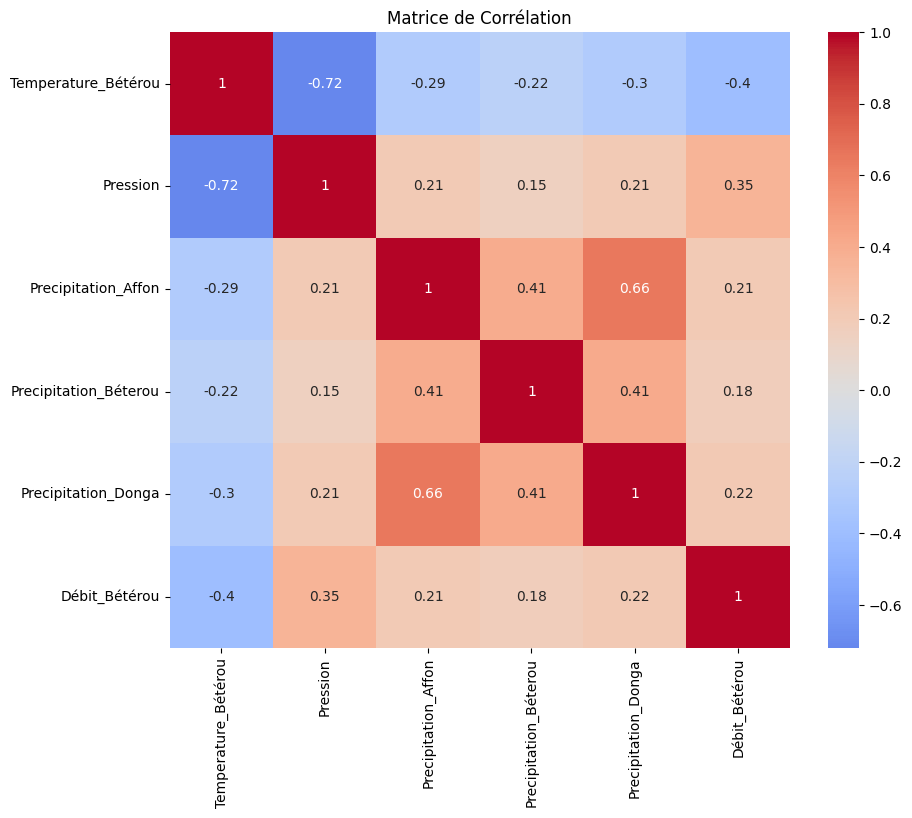

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de Corrélation')

# Show the plots
plt.show()

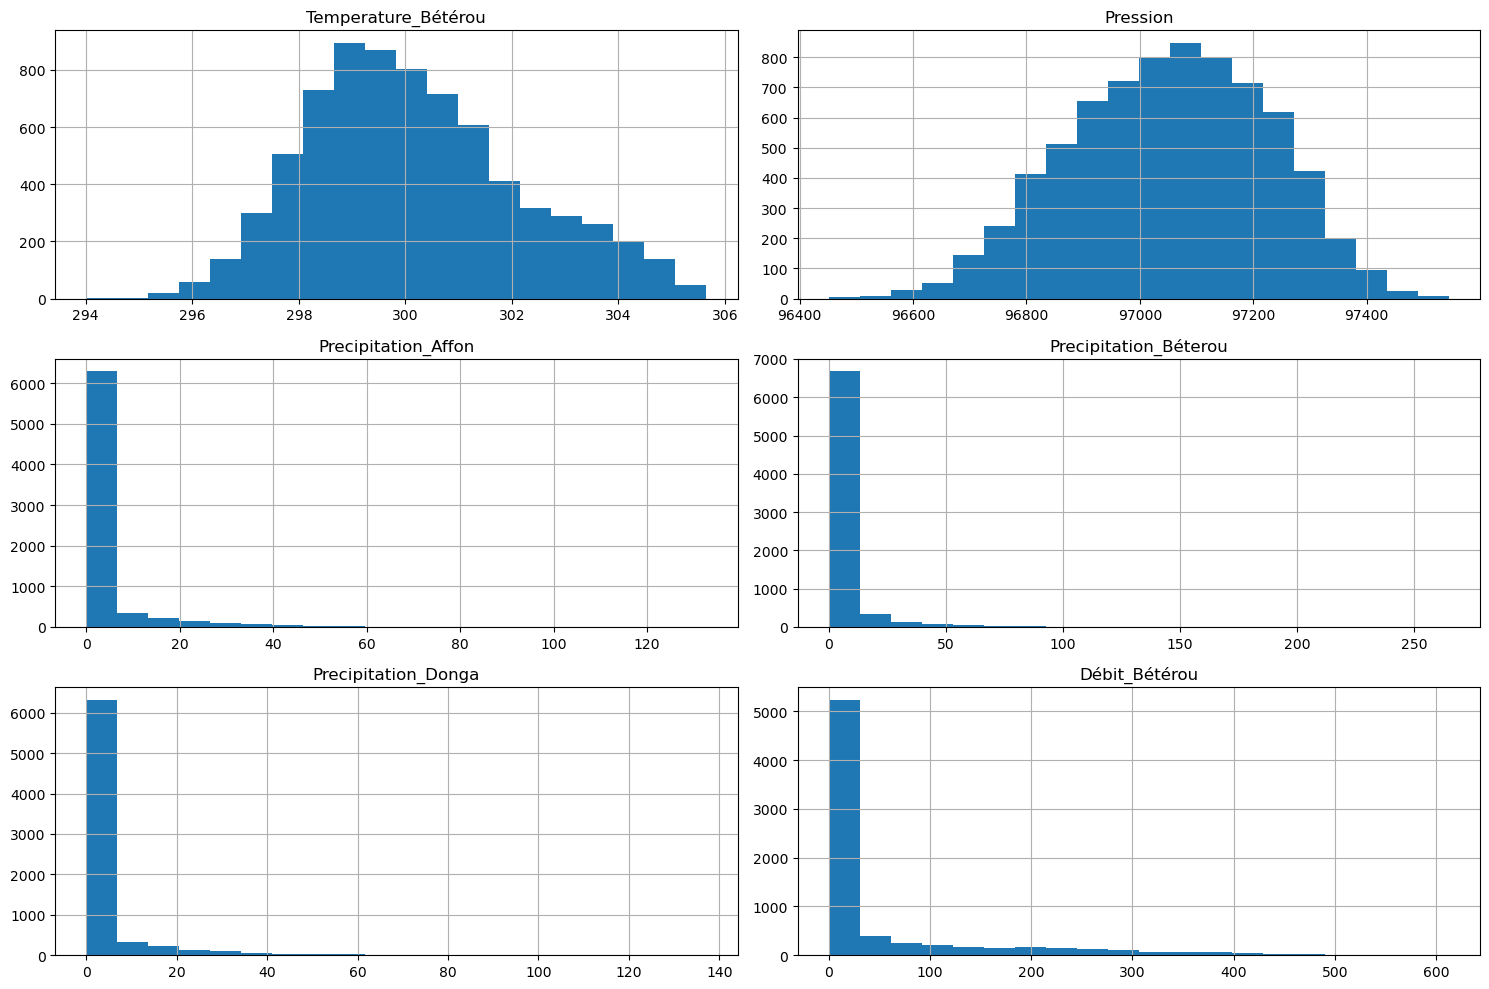

In [ ]:
# Histogrammes
data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

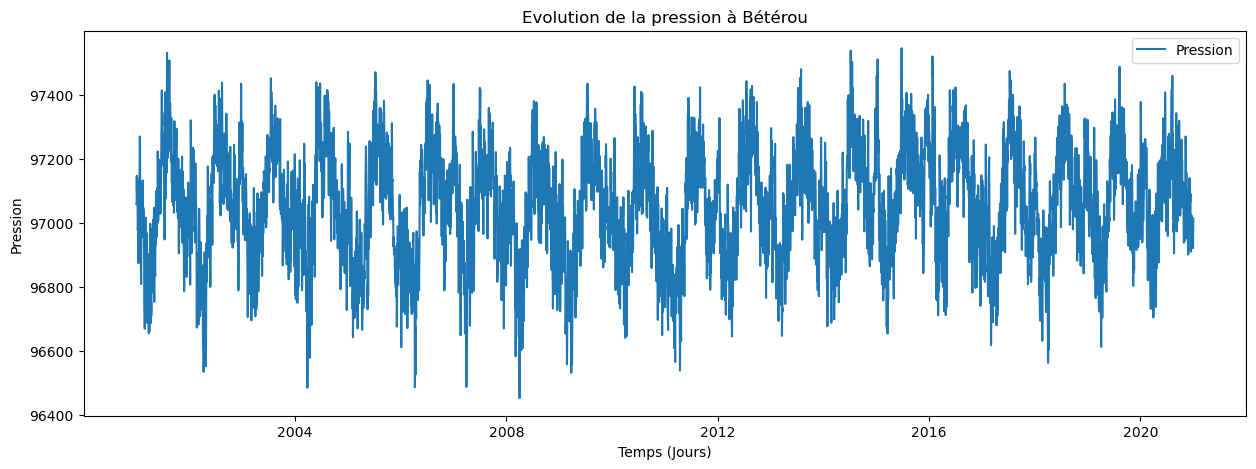

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(data['Pression'], label='Pression')
plt.title('Evolution de la pression à Bétérou')
plt.xlabel('Temps (Jours)')
plt.ylabel('Pression')
plt.legend()
plt.show()

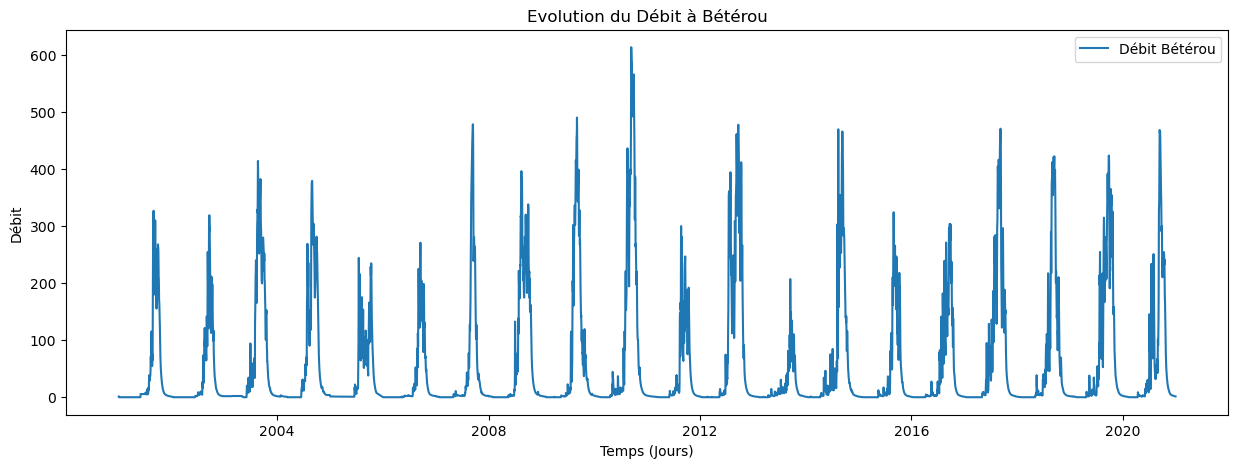

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(data['Débit_Bétérou'], label='Débit Bétérou')
plt.title('Evolution du Débit à Bétérou')
plt.xlabel('Temps (Jours)')
plt.ylabel('Débit')
plt.legend()
plt.show()

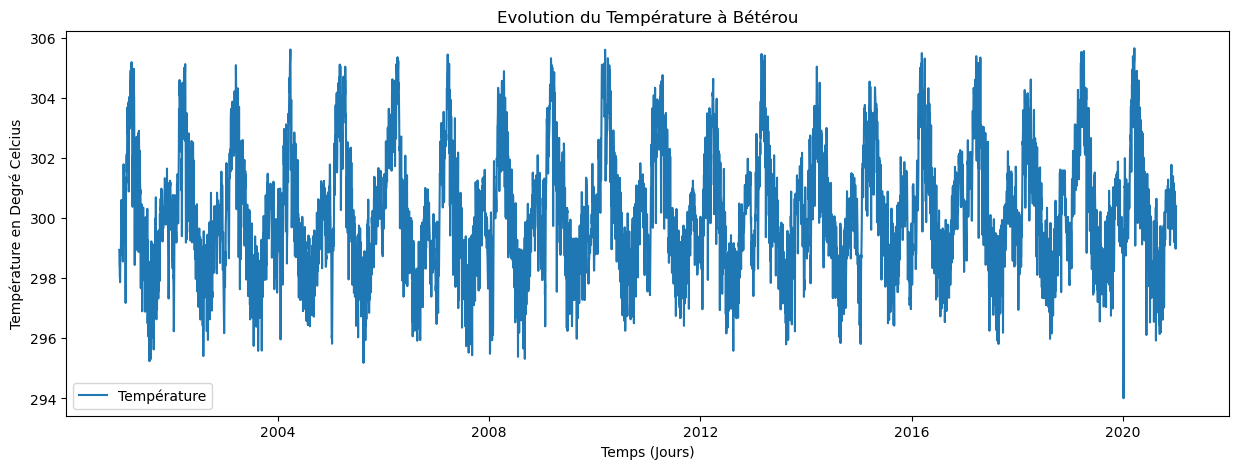

In [ ]:

plt.figure(figsize=(15, 5))
plt.plot(data['Temperature_Bétérou'], label='Température')
plt.title('Evolution du Température à Bétérou')
plt.xlabel('Temps (Jours)')
plt.ylabel('Température en Degré Celcius')
plt.legend()
plt.show()

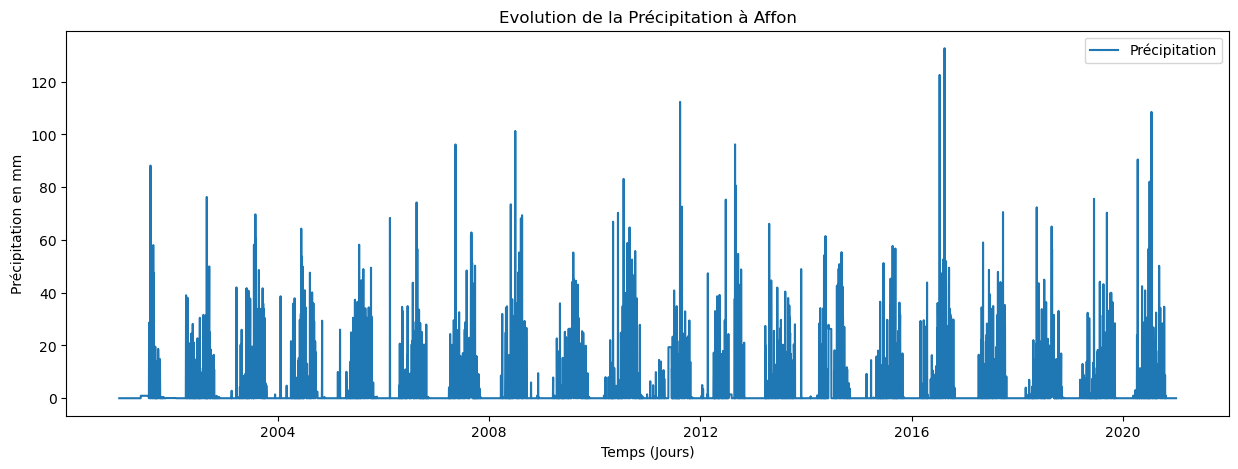

In [ ]:

plt.figure(figsize=(15, 5))
plt.plot(data['Precipitation_Affon'], label='Précipitation')
plt.title('Evolution de la Précipitation à Affon')
plt.xlabel('Temps (Jours)')
plt.ylabel('Précipitation en mm')
plt.legend()
plt.show()

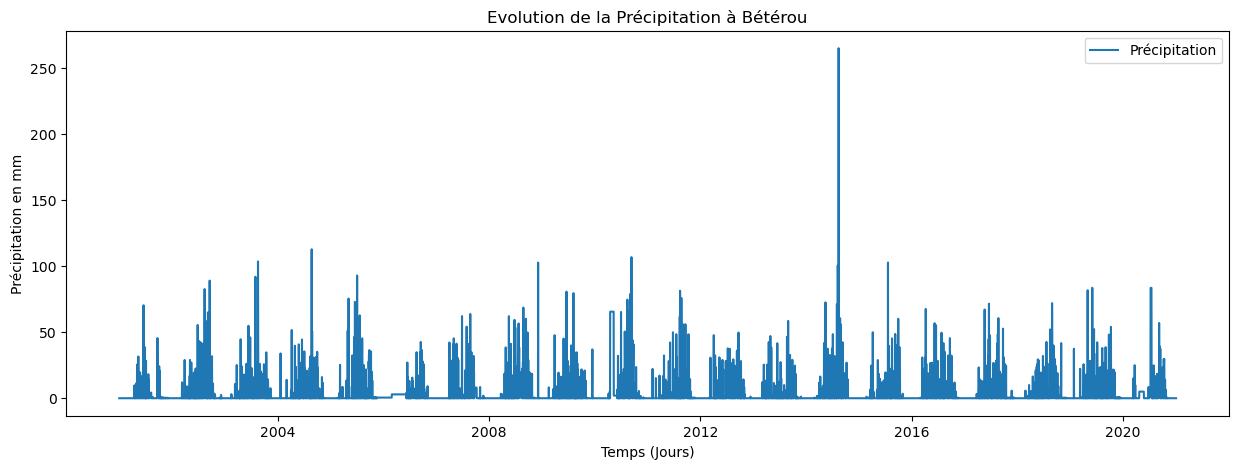

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(data['Precipitation_Béterou'], label='Précipitation')
plt.title('Evolution de la Précipitation à Bétérou')
plt.xlabel('Temps (Jours)')
plt.ylabel('Précipitation en mm')
plt.legend()
plt.show()

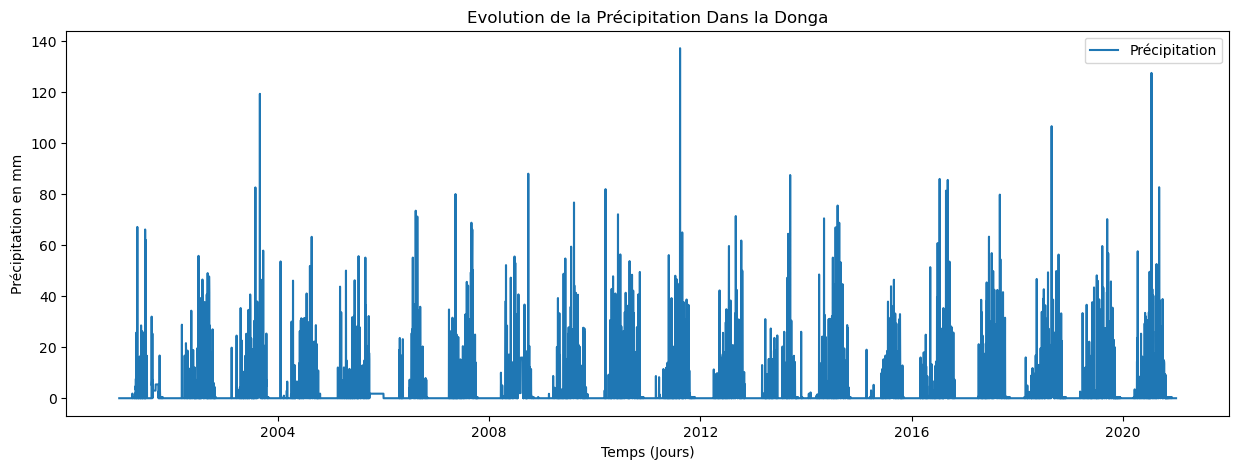

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(data['Precipitation_Donga'], label='Précipitation')
plt.title('Evolution de la Précipitation Dans la Donga')
plt.xlabel('Temps (Jours)')
plt.ylabel('Précipitation en mm')
plt.legend()
plt.show()

In [ ]:
df = data

# Rééchantillonnez et calculez la somme pour 'mtpr' et la moyenne pour les autres variables
df_year = df.resample('Y').agg({'Temperature_Bétérou': 'mean',
                                'Pression': 'mean',
                                 'Precipitation_Affon': 'sum',
                                 'Precipitation_Béterou': 'sum',
                                 'Precipitation_Donga': 'sum',
                                 'Débit_Bétérou': 'sum'})

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the data
df_stand = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

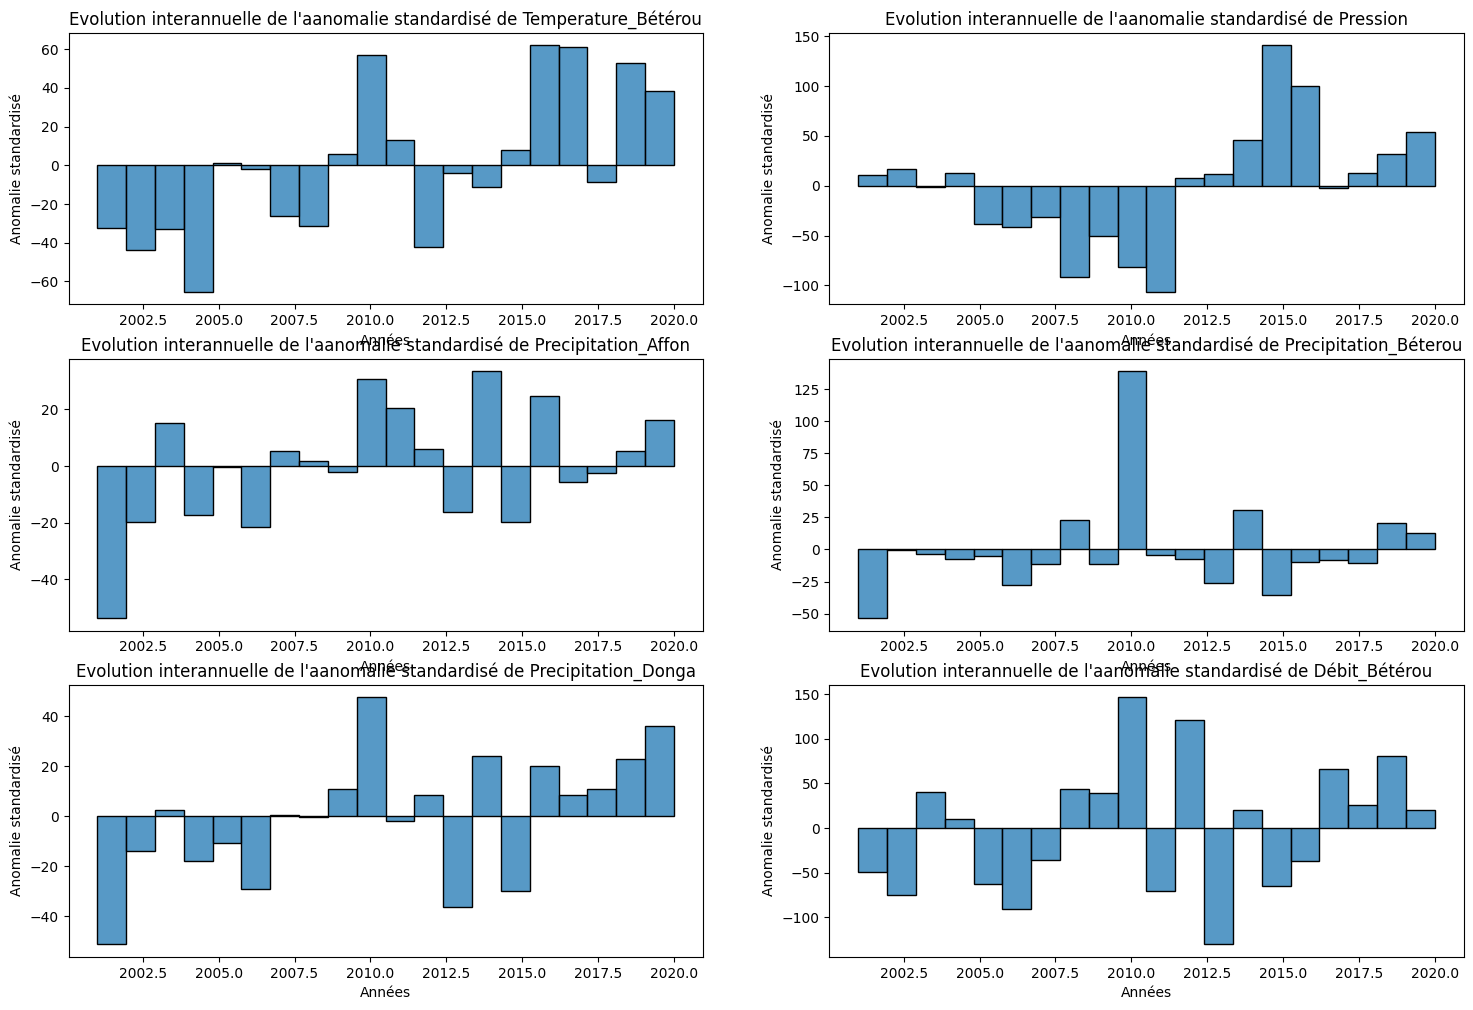

In [ ]:

plt.figure(figsize=(18, 12))

# Create a histogram for each variable
for i, column in enumerate(df_stand.columns):
    plt.subplot(3, 2, i+1)  # Create a subplot for each variable
    # We use the index year for the x-axis and the column values for the y-axis
    sns.histplot(x=df_stand.index.year, weights=df_stand[column], bins=len(df_stand.index.year.unique()), kde=False)
    plt.title(f"Evolution interannuelle de l'aanomalie standardisé de {column}")
    plt.xlabel('Années')
    plt.ylabel('Anomalie standardisé')

# plt.tight_layout()
plt.show()


In [ ]:
data1 = data
data1['Time'] = pd.to_datetime(data1['Time'])
data1['Annee'] = data1['Time'].dt.year
data1['Mois'] = data1['Time'].dt.month
data1['Jour'] = data1['Time'].dt.day

In [ ]:
# Donnee mensuelle et annuelle

In [ ]:
import pandas as pd

# Sauvegarder les données au pas de temps mensuel

monthly_data = data.resample('M', on='Time').agg({
    'Temperature_Bétérou': 'mean',
    'Pression': 'mean',
    'Precipitation_Affon': 'sum',
    'Precipitation_Béterou': 'sum',
    'Precipitation_Donga': 'sum',
    'Débit_Bétérou': 'sum',
    'Annee' : 'first',
    'Mois' : 'first'
})

# Sauvegarder les données au pas de temps annuel

annual_data = data.resample('Y', on='Time').agg({
    'Temperature_Bétérou': 'mean',
    'Pression': 'mean',
    'Precipitation_Affon': 'sum',
    'Precipitation_Béterou': 'sum',
    'Precipitation_Donga': 'sum',
    'Débit_Bétérou': 'sum',
    'Annee' : 'first',
})

In [ ]:
# Creation de la variable Precipitation (Une combinaison des trois autres variables de précipitation)

In [ ]:
annual1 = annual_data
annual1['Precipitation'] = annual_data['Precipitation_Affon']*0.25 +annual_data['Precipitation_Béterou']*0.28 +annual_data['Precipitation_Donga']*0.47

In [ ]:
monthly_data1 = monthly_data
monthly_data1['Precipitation'] = monthly_data['Precipitation_Affon']*0.25 +monthly_data['Precipitation_Béterou']*0.28 +monthly_data['Precipitation_Donga']*0.47

In [ ]:
# Evolution interannuelle

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 5))
plt.plot(annual1['Annee'], annual1['Precipitation'], label='Precipitation')
plt.title('Evolution de la Precipitation')
plt.xlabel('Date')
plt.legend()

plt.xticks(range(int(annual1['Annee'].min()), int(annual1['Annee'].max()) + 1))
plt.show()


In [ ]:
# Evolution mensuelle au fil des annees

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Définir le style de Seaborn (facultatif)
sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))
sns.lineplot(x="Time", y="Precipitation", data=monthly_data1, ci=None)
plt.title('Precipitation mensuelle au fil des années')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')


plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.gcf().autofmt_xdate()

plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Convertir la colonne "Time" en datetime
data1['Time'] = pd.to_datetime(data1['Time'])

# Filtrer les données pour inclure uniquement celles de 2015 à 2020
filtered_data = data1[(data1['Time'].dt.year >= 2010) & (data1['Time'].dt.year <= 2011)]

# Utiliser Seaborn pour tracer la variable "Débit_Bétérou"
plt.figure(figsize=(12, 6))
sns.lineplot(x="Time", y="Débit_Bétérou", data=filtered_data)

# Formater et ajuster les dates sur l'axe des abscisses
date_format = mdates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))


plt.title('Évolution du Débit (2010-2011)')
plt.xlabel('Date')
plt.ylabel('Débit à Bétérou')
plt.show()

In [ ]:
# Variabilité spatiale

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd
import xarray as xr

# Fonction pour tracer la carte d'une variable avec une palette de couleurs spécifique
def tracer_carte_variable(variable, palette_couleurs, titre, chemin_shapefile, chemin_data):
    # Charger le jeu de données NetCDF
    data = xr.open_dataset(chemin_data)

    # Calculer la moyenne temporelle pour la variable spécifique
    moyenne_temporelle = data[variable].mean(dim='time')*3600

    # Charger le fichier shapefile avec geopandas
    shapefile = gpd.read_file(chemin_shapefile)
    shapefile = shapefile.to_crs(epsg=4326)

    # Créer une nouvelle figure
    plt.figure(figsize=(10, 5))

    # Définir la projection cartographique
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Limiter la vue à la zone du shapefile
    ax.set_extent([shapefile.total_bounds[0], shapefile.total_bounds[2],
                   shapefile.total_bounds[1], shapefile.total_bounds[3]], crs=ccrs.PlateCarree())

    # Ajouter les lignes de côte pour le contexte
    ax.coastlines()

    # Tracer les données avec la palette de couleurs spécifiée
    im = ax.contourf(data.longitude, data.latitude, moyenne_temporelle,
                     transform=ccrs.PlateCarree(), cmap=palette_couleurs)

    # Superposer le shapefile
    shapefile.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=2, transform=ccrs.PlateCarree())

    # Ajouter une barre de couleur
    plt.colorbar(im, ax=ax, orientation='vertical', pad=0.05)

    # Mettre le titre avec le nom de la variable
    plt.title(titre)

    # Afficher le graphique
    plt.show()

# Utilisation de la fonction pour une variable avec une palette de couleurs spécifique
chemin_data = "C:/Users/Freddy H/Memoire Master II Folder/Donnee/data/Donne_meteo.nc"
chemin_shapefile = "C:/Users/Freddy H/Documents/Freddy/Master II Hydro informatique/Mémoire/Redaction/Beterou_reecree/Beterou.shp"

# Exemple pour la variable 't2m' avec la palette de couleurs 'coolwarm'
tracer_carte_variable('t2m', 'coolwarm', 'Température à 2 mètres', chemin_shapefile, chemin_data)

# Exemple pour la variable 'sp' avec la palette de couleurs 'viridis'
tracer_carte_variable('sp', 'viridis', 'Pression au niveau de la mer', chemin_shapefile, chemin_data)

# Exemple pour la variable 'mtpr' avec la palette de couleurs 'viridis'
tracer_carte_variable('mtpr', 'Blues', 'Precipitation', chemin_shapefile, chemin_data)

# Exemple pour la variable 'sp' avec la palette de couleurs 'viridis'
tracer_carte_variable('v10', 'YlOrRd', 'Composante v du vent', chemin_shapefile, chemin_data)
